In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = np.loadtxt("data/mnist1.5k.csv", delimiter=",")
d=mnist[:,1:785]
c=mnist[:,0]
print "dimension de las imagenes y las clases", d.shape, c.shape

dimension de las imagenes y las clases (1500, 784) (1500,)


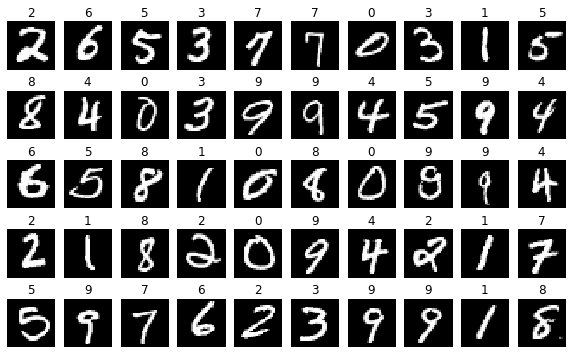

In [4]:
perm = np.random.permutation(range(d.shape[0]))[0:50]
random_imgs   = d[perm]
random_labels = c[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## Principal Component Analysis

In [39]:
from sklearn.decomposition import PCA

mnist = np.loadtxt("data/mnist1.5k.csv", delimiter=",")
X=mnist[:,1:785]
y=mnist[:,0]

pca = PCA(n_components=60)
Xp = pca.fit_transform(X)


### obtain principal components

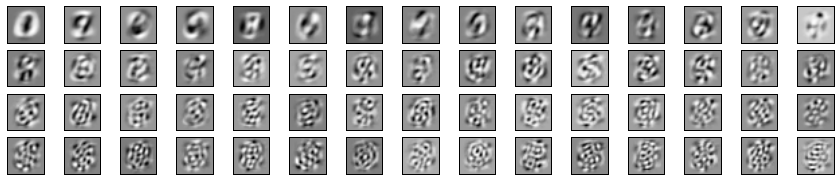

In [40]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(pca.components_)):
    plt.subplot(np.ceil(len(pca.components_)/15.),15,i+1)
    plt.imshow((pca.components_[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### verify reconstruction from pricipal components

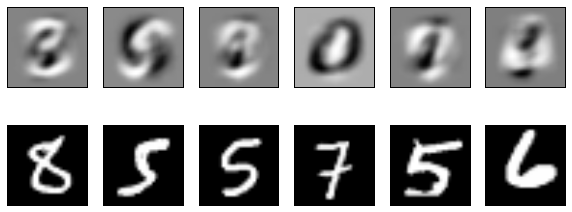

In [37]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    k = np.random.randint(len(X))
    plt.imshow((np.sum((pca.components_*Xp[k].reshape(-1,1)), axis=0)).reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])
    plt.subplot(3,6,6+i+1)
    plt.imshow(X[k].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### classification in the new representation space

In [38]:
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB

print np.mean(cross_val_score(GaussianNB(), X,y, cv=5 ))
print np.mean(cross_val_score(GaussianNB(), Xp,y, cv=5 ))

0.591975339782
0.64668283187


### observe new representation of first image 

In [6]:
Xp[0]

array([-630.21531389,  730.97102721, -103.8003352 ,  -96.74972755,
       -147.33798952, -469.2616089 , -411.86645651, -603.64390461,
        163.46361564, -244.03469871, -264.6911952 ,   -7.50383825,
        -93.3975162 , -315.31434323,  299.18094966,   43.28682601,
        -14.66232433,  373.48448663,  173.24322498,  -69.40862658,
         87.64638908, -271.77913028,   32.25080879,   -2.67160456,
        146.24572355, -194.55502938,   -6.74304306, -130.7008288 ,
        279.14603786,  -79.74899041,  -44.83719588,  112.91290078,
         23.97616261,  172.07845484,  113.23260655, -136.89505407,
       -102.89335273,   14.80188378, -243.57461394,   85.78568031,
         53.68704712,   -6.22277997, -127.53035025,  161.3256393 ,
         57.95839542,  -46.52757866,   24.80897133,   43.03267141,
       -113.9969619 ,   22.26457237,  110.39242411,  -75.08889401,
        128.55487241,   13.89203694, -103.40402186,   14.02635164,
         63.68165415,   86.4281342 ,   55.26060598,  -16.84914

## Non negative matrix factorization

Descomponemos una matriz $V \in \mathbb{R}_+^{m\times n}$ en el producto $W \times H$, con $W \in \mathbb{R}_+^{m\times r}$ y $H \in \mathbb{R}_+^{r\times n}$ con la restricción de que todo sea positivo ($\in \mathbb{R}_+$), de forma que:

$$V \approx W \times H$$

Las filas de $H$ son los _componentes base_, y se soluciona planteándolo como un problema de optimización matemática con restricciones.

$$\begin{split}
argmin_{W,H}\;& ||V-W\times H||\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$

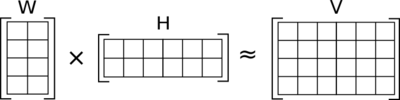

In [7]:
from IPython.display import Image
Image(filename='imgs/nmf.png')

### obtain decomponsition

In [41]:
from sklearn.decomposition import NMF
X=mnist[:,1:785]; y=mnist[:,0]

nmf = NMF(n_components=15, init="random")
Xn  = nmf.fit_transform(X)

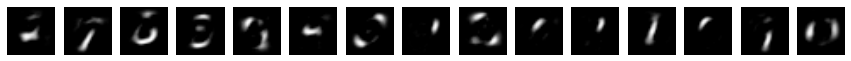

In [42]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(nmf.components_)):
    plt.subplot(len(nmf.components_)/15,15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

In [43]:
Xn[0,:]

array([ 3.03376604,  0.        ,  0.        ,  0.        ,  0.        ,
        1.17510994,  4.56224712,  0.        ,  0.33756972,  0.        ,
        5.38651148,  5.23197066,  0.        ,  0.        ,  0.        ])

### check reconstruction

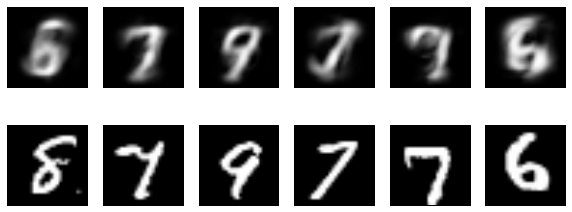

In [10]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    k = np.random.randint(len(X))
    plt.imshow(np.abs(np.sum((nmf.components_*Xn[k].reshape(-1,1)), axis=0)).reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])
    plt.subplot(3,6,6+i+1)
    plt.imshow(X[k].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

### classification in the new representation space

In [11]:
print np.mean(cross_val_score(GaussianNB(), X,y, cv=5 ))
print np.mean(cross_val_score(GaussianNB(), Xn,y, cv=5 ))

0.591975339782
0.775931354059


### first image in new representation space
observe all components are positive

In [13]:
Xn[0]

array([  7.35361581,  11.60885885,   0.        ,   0.        ,
         0.        ,   2.02731147,   0.        ,  12.34086542,
         0.1571359 ,   0.        ,   0.        ,   1.90013533,
         0.        ,   2.73170074,   0.        ])

## NMF for face recognition

In [17]:
faces = pickle.load( open( "data/faces.pkl", "rb" ) )
faces.shape

(535, 361)

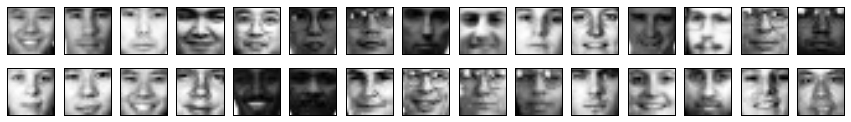

In [18]:
plt.figure(figsize=(15,2))
for i in range(30):
    plt.subplot(2,15,i+1)
    plt.imshow(faces[np.random.randint(len(faces))].reshape(19,19), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

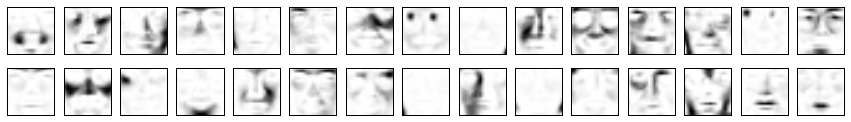

In [19]:
nmf      = NMF(n_components=30, init="random")
faces_n  = nmf.fit_transform(faces)
cols=20
plt.figure(figsize=(15,2))
for i in range(len(nmf.components_)):
    plt.subplot(np.ceil(len(nmf.components_)/15.),15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(19,19)), cmap = plt.cm.Greys)
    plt.xticks([]); plt.yticks([])

forcing sparseness in the components. extend the optimization problem with the $L_1$ norm on the base components:

$$\begin{split}
argmin_{W,H}\;& ||V-W\times H|| + ||H||^2_1\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$

we could also force sparness in the new representation
$$\begin{split}
argmin_{W,H}\;& ||V-W\times H|| + ||W||^2_1\\
s.t.&\;W,H \in \mathbb{R}_+
\end{split}$$


24159.5071548


/opt/anaconda/lib/python2.7/site-packages/sklearn/decomposition/nmf.py:997: DeprecationWarning: Controlling regularization through the sparseness, beta and eta arguments is only available for 'pg' solver, which will be removed in release 0.19. Use another solver with L1 or L2 regularization instead.
  " regularization instead.", DeprecationWarning)


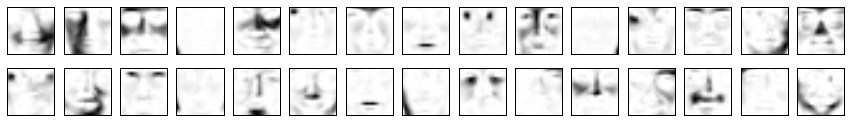

In [20]:
nmf      = NMF(n_components=30, init="nndsvd", sparseness="components", eta=1e5, l1_ratio=1, beta=100.)
faces_n  = nmf.fit_transform(faces)
cols=20
plt.figure(figsize=(15,2))
print np.sum(nmf.components_)
for i in range(len(nmf.components_)):
    plt.subplot(np.ceil(len(nmf.components_)/15.),15,i+1)
    plt.imshow(np.abs(nmf.components_[i].reshape(19,19)), cmap = plt.cm.Greys)
    plt.xticks([]); plt.yticks([])